In [1]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from time import time


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


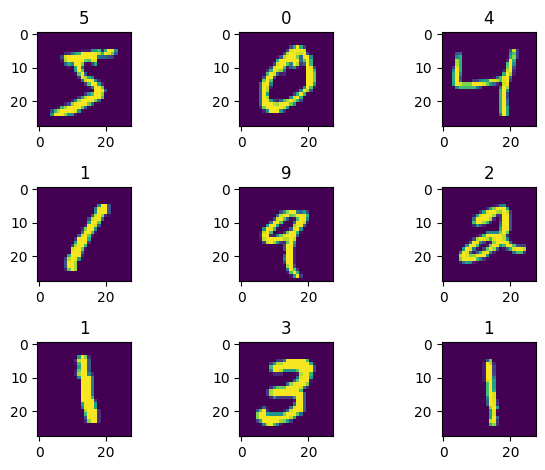

In [2]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)



Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

In [3]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)


select_train = np.logical_or(np.equal(ytrain,4),np.equal(ytrain,9))
select_test = np.logical_or(np.equal(ytest,4),np.equal(ytest,9))
Xtrain = Xtrain[select_train,:]
Xtest = Xtest[select_test,:]
ytrain = np.sign(np.equal(ytrain[select_train],4.)-.5)
ytest = np.sign(np.equal(ytest[select_test],4.)-.5)


m,n = Xtrain.shape
mt = Xtest.shape[0]

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [4]:
def getLossFunction(theta):
    #calculate value, s, for inner sigma
    s = np.matmul(theta, (ytrain * Xtrain.T))
    #calculate sigma first
    sigma = 1 / (1 + np.exp(s * -1))
    #calculate log
    log = np.log(sigma)
    #summation
    summation = np.sum(log)
    #divide by -m
    return summation * (-1/s.shape[0])

def getGradient(theta):
    #calculate value, s, for inner sigma
    s = np.matmul(theta, (ytrain * Xtrain.T))
    #calculate sigma first
    sigma = 1 / (1 + np.exp(s * -1))
    #subtract 1
    sigma -= 1
    #get dot product
    dot = np.dot(sigma, (ytrain * Xtrain.T).T)
    #divide by m
    return dot / (ytrain.shape[0])

# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ', getLossFunction(theta),np.sum(getGradient(theta)))


Check number:  45.19215648734921 12343.176947604472


In [5]:
def classAccuracy(theta, xValue, yValue):
    yhat = np.sign(np.dot(theta,xValue.T))
    summation = np.sum(np.equal(yhat, yValue).astype(int))
    return summation/yhat.shape[0]

In [6]:
#gradient descent to minimize logistic loss
#theta -= 10**(-6) * getGradient(theta)

thetaArray = []

gradientDescentRuntime = []

#run gradient descent (above) for 1500 iterations
theta = np.linspace(-.1,.1,n)
start = time()
for i in range(1500):
    thetaArray.append(theta)
    theta = theta- 10**(-6) * getGradient(theta)
    gradientDescentRuntime.append(time()-start)

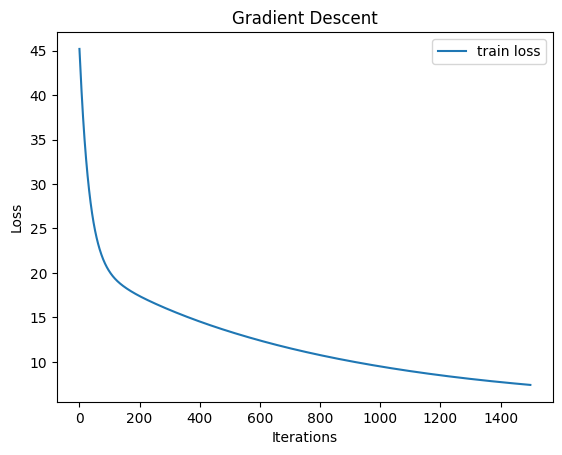

In [7]:
trainLoss = [] 
for t in thetaArray:
    trainLoss.append(getLossFunction(t))
    
#plot
plt.plot(range(0,1500), trainLoss, label='train loss')
plt.title("Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

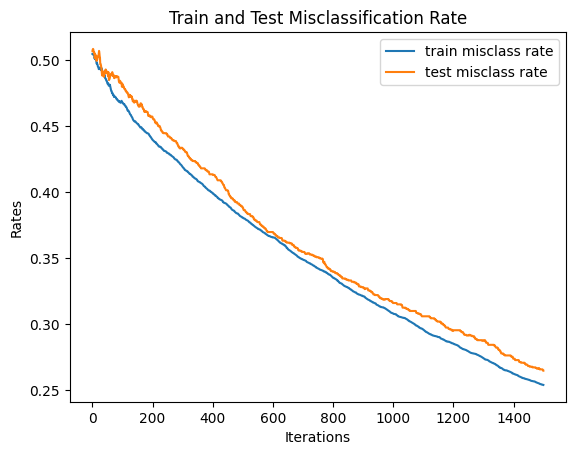

final train accuracy:  0.7460775167500636
final test accuracy:  0.7353088900050226


In [8]:
#calculate train misclassification rate
trainMisclass = []
trainAccuracyComparison = []
for t in thetaArray:
    trainMisclass.append(1-classAccuracy(t, Xtrain, ytrain))
    trainAccuracyComparison.append(classAccuracy(t, Xtrain, ytrain))
#plot
plt.plot(range(0,1500), trainMisclass, label='train misclass rate')



#calculate test misclassification rate
testMisclass = []
testAccuracyComparison = []
for t in thetaArray:
    testMisclass.append(1-classAccuracy(t, Xtest, ytest))
    testAccuracyComparison.append(classAccuracy(t, Xtest, ytest))
#plot
plt.plot(range(0,1500), testMisclass, label='test misclass rate')



plt.title("Train and Test Misclassification Rate")
plt.xlabel('Iterations')
plt.ylabel('Rates')
plt.legend()
plt.show()


#Report the final train and test accuracy values.
print('final train accuracy: ', 1-trainMisclass[len(trainMisclass)-1])
print('final test accuracy: ', 1-testMisclass[len(testMisclass)-1])

In [9]:
#gradient descent to minimize logistic loss
#theta -= 10**(-6) * getGradient(theta)

thetaArray = []

gradientDescentRuntime = []

#run gradient descent (above) for 1500 iterations
theta = np.linspace(-.1,.1,n)
start = time()
for i in range(1500):
    theta = theta- 10**(-6) * getGradient(theta)
    if (i%10 == 0):
        thetaArray.append(theta)
        gradientDescentRuntime.append(time()-start)
     
    
    
trainLoss = [] 
for t in thetaArray:
    trainLoss.append(getLossFunction(t))
    

#calculate train misclassification rate
trainMisclass = []
trainAccuracyComparison = []
for t in thetaArray:
    trainMisclass.append(1-classAccuracy(t, Xtrain, ytrain))
    trainAccuracyComparison.append(classAccuracy(t, Xtrain, ytrain))



#calculate test misclassification rate
testMisclass = []
testAccuracyComparison = []
for t in thetaArray:
    testMisclass.append(1-classAccuracy(t, Xtest, ytest))
    testAccuracyComparison.append(classAccuracy(t, Xtest, ytest))

In [10]:
def getStochGradient(theta, minibatch):    
    #calculate value, s, for inner sigma
    s = np.matmul(theta,(ytrain[minibatch]*Xtrain[minibatch].T))
    #calculate sigma first
    sigma = 1 / (1 + np.exp(s * -1))
    #subtract 1
    sigma -= 1
    #get dot product
    dot = np.dot(sigma,(ytrain[minibatch]*Xtrain[minibatch].T).T)
    #divide by minibatch length
    return dot / (len(minibatch)) 
    
    
# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ',np.sum(getStochGradient(theta,[1,4,6,2])))


Check number:  5803.5


In [11]:
thetaArray = []
stochGradientDescentRuntime = []

theta = np.linspace(-.1,.1,n)


start = time()
for i in range(5000):
    minibatch = np.random.randint(0,ytrain.shape[0],50).tolist()
    theta = theta - 10**(-6) * getStochGradient(theta, minibatch)
    if (i%100 == 0):
        thetaArray.append(theta)
        stochGradientDescentRuntime.append(time()-start)



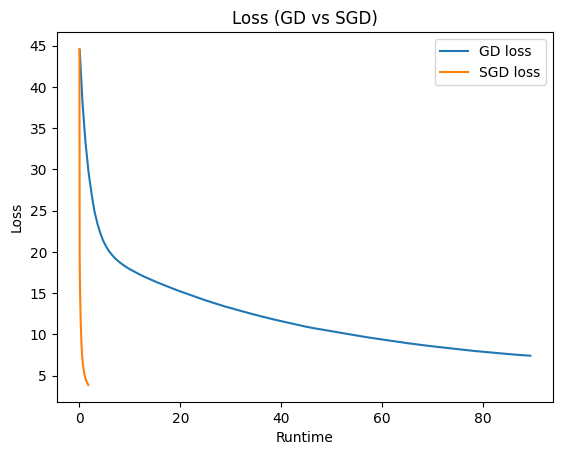

In [17]:
#loss by runtime

# gradientDescentRuntime
# stochGradientDescentRuntime


stochGradientLoss = []
for t in thetaArray:
    stochGradientLoss.append(getLossFunction(t))

plt.plot(gradientDescentRuntime, trainLoss, label="GD loss")
plt.plot(stochGradientDescentRuntime, stochGradientLoss, label="SGD loss")
plt.legend()
plt.title("Loss (GD vs SGD)")
plt.xlabel("Runtime")
plt.ylabel("Loss")
plt.show()

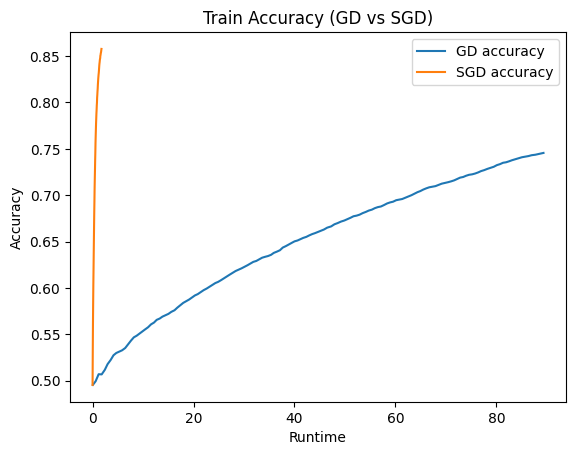

In [18]:
#training accuracy by runtime

# gradientDescentRuntime
# stochGradientDescentRuntime
# trainAccuracyComparison

stochGradientTrainAccuracy = []
for t in thetaArray:
    stochGradientTrainAccuracy.append(classAccuracy(t, Xtrain, ytrain))
    
plt.plot(gradientDescentRuntime, trainAccuracyComparison, label="GD accuracy")
plt.plot(stochGradientDescentRuntime, stochGradientTrainAccuracy, label="SGD accuracy")
plt.legend()
plt.title("Train Accuracy (GD vs SGD)")
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.show()

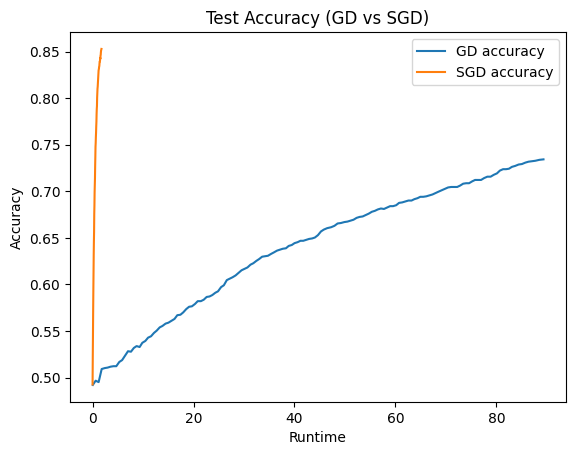

In [21]:
#test accuracy by runtime

# gradientDescentRuntime
# stochGradientDescentRuntime
# testAccuracyComparison

stochGradientTestAccuracy = []
for t in thetaArray:
    stochGradientTestAccuracy.append(classAccuracy(t, Xtest, ytest))
    
plt.plot(gradientDescentRuntime, testAccuracyComparison, label="GD accuracy")
plt.plot(stochGradientDescentRuntime, stochGradientTestAccuracy, label="SGD accuracy")
plt.legend()
plt.title("Test Accuracy (GD vs SGD)")
plt.xlabel("Runtime")
plt.ylabel("Accuracy")
plt.show()

In [20]:
#you can use time() to measure runtime of things.
#sample runtime code: 

def do_stuff_takes_nseconds(n):
    wait(n)
start = time()
do_stuff_takes_nseconds(n)
print(time()-start, ' seconds to run code')

NameError: name 'wait' is not defined